In [1]:
#imports
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')
pd.set_option('max_column', None)

## Loading data

In [2]:
data  = pd.read_excel('../data/Week1_challenge_data_source.xlsx', na_values=['?', None])
data.head(5)

,Bearer Id,Start,Start ms,End,End ms,Dur. (ms),IMSI,MSISDN/Number,IMEI,Last Location Name,Avg RTT DL (ms),Avg RTT UL (ms),Avg Bearer TP DL (kbps),Avg Bearer TP UL (kbps),TCP DL Retrans. Vol (Bytes),TCP UL Retrans. Vol (Bytes),DL TP < 50 Kbps (%),50 Kbps < DL TP < 250 Kbps (%),250 Kbps < DL TP < 1 Mbps (%),DL TP > 1 Mbps (%),UL TP < 10 Kbps (%),10 Kbps < UL TP < 50 Kbps (%),50 Kbps < UL TP < 300 Kbps (%),UL TP > 300 Kbps (%),HTTP DL (Bytes),HTTP UL (Bytes),Activity Duration DL (ms),Activity Duration UL (ms),Dur. (ms).1,Handset Manufacturer,Handset Type,Nb of sec with 125000B < Vol DL,Nb of sec with 1250B < Vol UL < 6250B,Nb of sec with 31250B < Vol DL < 125000B,Nb of sec with 37500B < Vol UL,Nb of sec with 6250B < Vol DL < 31250B,Nb of sec with 6250B < Vol UL < 37500B,Nb of sec with Vol DL < 6250B,Nb of sec with Vol UL < 1250B,Social Media DL (Bytes),Social Media UL (Bytes),Google DL (Bytes),Google UL (Bytes),Email DL (Bytes),Email UL (Bytes),Youtube DL (Bytes),Youtube UL (Bytes),Netflix DL (Bytes),Netflix UL (Bytes),Gaming DL (Bytes),Gaming UL (Bytes),Other DL (Bytes),Other UL (Bytes),Total UL (Bytes),Total DL (Bytes)
0,13114483460844900352,2019-04-04 12:01:18,770.0,2019-04-25 14:35:31,662.0,1823652.0,2.082014e+14,3.366496e+10,3.552121e+13,9164566995485190,42.0,5.0,23.0,44.0,NaN,NaN,100.0,0.0,0.0,0.0,100.0,0.0,0.0,0.0,NaN,NaN,37624.0,38787.0,1.823653e+09,Samsung,Samsung Galaxy A5 Sm-A520F,NaN,NaN,NaN,NaN,NaN,NaN,213.0,214.0,1545765.0,24420.0,1634479.0,1271433.0,3563542.0,137762.0,15854611.0,2501332.0,8198936.0,9656251.0,278082303.0,14344150.0,171744450.0,8814393.0,36749741.0,308879636.0
1,13114483482878900224,2019-04-09 13:04:04,235.0,2019-04-25 08:15:48,606.0,1365104.0,2.082019e+14,3.368185e+10,3.579401e+13,L77566A,65.0,5.0,16.0,26.0,NaN,NaN,100.0,0.0,0.0,0.0,100.0,0.0,0.0,0.0,NaN,NaN,168.0,3560.0,1.365104e+09,Samsung,Samsung Galaxy J5 (Sm-J530),NaN,NaN,NaN,NaN,NaN,NaN,971.0,1022.0,1926113.0,7165.0,3493924.0,920172.0,629046.0,308339.0,20247395.0,19111729.0,18338413.0,17227132.0,608750074.0,1170709.0,526904238.0,15055145.0,53800391.0,653384965.0
2,13114483484080500736,2019-04-09 17:42:11,1.0,2019-04-25 11:58:13,652.0,1361762.0,2.082003e+14,3.376063e+10,3.528151e+13,D42335A,NaN,NaN,6.0,9.0,NaN,NaN,100.0,0.0,0.0,0.0,100.0,0.0,0.0,0.0,NaN,NaN,0.0,0.0,1.361763e+09,Samsung,Samsung Galaxy A8 (2018),NaN,NaN,NaN,NaN,NaN,NaN,751.0,695.0,1684053.0,42224.0,8535055.0,1694064.0,2690151.0,672973.0,19725661.0,14699576.0,17587794.0,6163408.0,229584621.0,395630.0,410692588.0,4215763.0,27883638.0,279807335.0
3,13114483485442799616,2019-04-10 00:31:25,486.0,2019-04-25 07:36:35,171.0,1321509.0,2.082014e+14,3.375034e+10,3.535661e+13,T21824A,NaN,NaN,44.0,44.0,NaN,NaN,100.0,0.0,0.0,0.0,100.0,0.0,0.0,0.0,NaN,NaN,3330.0,37882.0,1.321510e+09,undefined,undefined,NaN,NaN,NaN,NaN,NaN,NaN,17.0,207.0,644121.0,13372.0,9023734.0,2788027.0,1439754.0,631229.0,21388122.0,15146643.0,13994646.0,1097942.0,799538153.0,10849722.0,749039933.0,12797283.0,43324218.0,846028530.0
4,13114483499480700928,2019-04-12 20:10:23,565.0,2019-04-25 10:40:32,954.0,1089009.0,2.082014e+14,3.369980e+10,3.540701e+13,D88865A,NaN,NaN,6.0,9.0,NaN,NaN,100.0,0.0,0.0,0.0,100.0,0.0,0.0,0.0,NaN,NaN,0.0,0.0,1.089009e+09,Samsung,Samsung Sm-G390F,NaN,NaN,NaN,NaN,NaN,NaN,607.0,604.0,862600.0,50188.0,6248284.0,1500559.0,1936496.0,173853.0,15259380.0,18962873.0,17124581.0,415218.0,527707248.0,3529801.0,550709500.0,13910322.0,38542814.0,569138589.0


In [11]:
# column names
list(data.columns)

['Bearer Id',
 'Start',
 'Start ms',
 'End',
 'End ms',
 'Dur. (ms)',
 'IMSI',
 'MSISDN/Number',
 'IMEI',
 'Last Location Name',
 'Avg RTT DL (ms)',
 'Avg RTT UL (ms)',
 'Avg Bearer TP DL (kbps)',
 'Avg Bearer TP UL (kbps)',
 'TCP DL Retrans. Vol (Bytes)',
 'TCP UL Retrans. Vol (Bytes)',
 'DL TP < 50 Kbps (%)',
 '50 Kbps < DL TP < 250 Kbps (%)',
 '250 Kbps < DL TP < 1 Mbps (%)',
 'DL TP > 1 Mbps (%)',
 'UL TP < 10 Kbps (%)',
 '10 Kbps < UL TP < 50 Kbps (%)',
 '50 Kbps < UL TP < 300 Kbps (%)',
 'UL TP > 300 Kbps (%)',
 'HTTP DL (Bytes)',
 'HTTP UL (Bytes)',
 'Activity Duration DL (ms)',
 'Activity Duration UL (ms)',
 'Dur. (ms).1',
 'Handset Manufacturer',
 'Handset Type',
 'Nb of sec with 125000B < Vol DL',
 'Nb of sec with 1250B < Vol UL < 6250B',
 'Nb of sec with 31250B < Vol DL < 125000B',
 'Nb of sec with 37500B < Vol UL',
 'Nb of sec with 6250B < Vol DL < 31250B',
 'Nb of sec with 6250B < Vol UL < 37500B',
 'Nb of sec with Vol DL < 6250B',
 'Nb of sec with Vol UL < 1250B',
 'Socia

In [13]:
# number of data points
print(f" There are {data.shape[0]} rows and {data.shape[1]} columns")

 There are 150001 rows and 55 columns


## Handling Missing Values

In [14]:
# how many missing values exist or better still what is the % of missing values in the dataset?
def percent_missing(df):

    # Calculate total number of cells in dataframe
    totalCells = np.product(df.shape)

    # Count number of missing values per column
    missingCount = df.isnull().sum()

    # Calculate total number of missing values
    totalMissing = missingCount.sum()

    # Calculate percentage of missing values
    print("The dataset contains", round(((totalMissing/totalCells) * 100), 2), "%", "missing values.")

percent_missing(data)

The dataset contains 12.48 % missing values.


In [15]:
# Which column(s) has missing values
data.isna().sum()

Bearer Id                                        0
Start                                            1
Start ms                                         1
End                                              1
End ms                                           1
Dur. (ms)                                        1
IMSI                                           570
MSISDN/Number                                    0
IMEI                                           572
Last Location Name                            1153
Avg RTT DL (ms)                              27829
Avg RTT UL (ms)                              27812
Avg Bearer TP DL (kbps)                          1
Avg Bearer TP UL (kbps)                          1
TCP DL Retrans. Vol (Bytes)                  88146
TCP UL Retrans. Vol (Bytes)                  96649
DL TP < 50 Kbps (%)                            754
50 Kbps < DL TP < 250 Kbps (%)                 754
250 Kbps < DL TP < 1 Mbps (%)                  754
DL TP > 1 Mbps (%)             

In [16]:
# fill missing with ffill method for columns (diag_1, diag_2, diag_3)
def fix_missing_ffill(df, col):
    df[col] = df[col].fillna(method='ffill')
    return df[col]

def fix_missing_bfill(df, col):
    df[col] = df[col].fillna(method='bfill')
    return df[col]

data['Bearer Id'] = fix_missing_ffill(data, 'Bearer Id')
data['MSISDN/Number'] = fix_missing_ffill(data, 'MSISDN/Number')

In [17]:
data.isna().sum()

Bearer Id                                        0
Start                                            1
Start ms                                         1
End                                              1
End ms                                           1
Dur. (ms)                                        1
IMSI                                           570
MSISDN/Number                                    0
IMEI                                           572
Last Location Name                            1153
Avg RTT DL (ms)                              27829
Avg RTT UL (ms)                              27812
Avg Bearer TP DL (kbps)                          1
Avg Bearer TP UL (kbps)                          1
TCP DL Retrans. Vol (Bytes)                  88146
TCP UL Retrans. Vol (Bytes)                  96649
DL TP < 50 Kbps (%)                            754
50 Kbps < DL TP < 250 Kbps (%)                 754
250 Kbps < DL TP < 1 Mbps (%)                  754
DL TP > 1 Mbps (%)             

In [20]:
data["Start"], data["End"] = pd.to_datetime(data["Start"], format='%m/%d/%Y %H:%M', errors='coerce'),\
    pd.to_datetime(data["End"], format='%m/%d/%Y %H:%M', errors='coerce')

data['MSISDN/Number'] = data['MSISDN/Number'].apply(lambda x: '{:.0f}'.format(x)).astype('str')

data['IMSI'] = data['IMSI'].apply(lambda x: '{:.0f}'.format(x)).astype('str')
data['IMEI'] = data['IMEI'].apply(lambda x: '{:.0f}'.format(x)).astype('str')

data['Handset Manufacturer'] = data['Handset Manufacturer'].astype('str')
data['Last Location Name'] = data['Last Location Name'].astype('str')

data.head(5)

,Bearer Id,Start,Start ms,End,End ms,Dur. (ms),IMSI,MSISDN/Number,IMEI,Last Location Name,Avg RTT DL (ms),Avg RTT UL (ms),Avg Bearer TP DL (kbps),Avg Bearer TP UL (kbps),TCP DL Retrans. Vol (Bytes),TCP UL Retrans. Vol (Bytes),DL TP < 50 Kbps (%),50 Kbps < DL TP < 250 Kbps (%),250 Kbps < DL TP < 1 Mbps (%),DL TP > 1 Mbps (%),UL TP < 10 Kbps (%),10 Kbps < UL TP < 50 Kbps (%),50 Kbps < UL TP < 300 Kbps (%),UL TP > 300 Kbps (%),HTTP DL (Bytes),HTTP UL (Bytes),Activity Duration DL (ms),Activity Duration UL (ms),Dur. (ms).1,Handset Manufacturer,Handset Type,Nb of sec with 125000B < Vol DL,Nb of sec with 1250B < Vol UL < 6250B,Nb of sec with 31250B < Vol DL < 125000B,Nb of sec with 37500B < Vol UL,Nb of sec with 6250B < Vol DL < 31250B,Nb of sec with 6250B < Vol UL < 37500B,Nb of sec with Vol DL < 6250B,Nb of sec with Vol UL < 1250B,Social Media DL (Bytes),Social Media UL (Bytes),Google DL (Bytes),Google UL (Bytes),Email DL (Bytes),Email UL (Bytes),Youtube DL (Bytes),Youtube UL (Bytes),Netflix DL (Bytes),Netflix UL (Bytes),Gaming DL (Bytes),Gaming UL (Bytes),Other DL (Bytes),Other UL (Bytes),Total UL (Bytes),Total DL (Bytes)
0,13114483460844900352,2019-04-04 12:01:18,770.0,2019-04-25 14:35:31,662.0,1823652.0,208201448079117,33664962239,35521209507511,9164566995485190,42.0,5.0,23.0,44.0,NaN,NaN,100.0,0.0,0.0,0.0,100.0,0.0,0.0,0.0,NaN,NaN,37624.0,38787.0,1.823653e+09,Samsung,Samsung Galaxy A5 Sm-A520F,NaN,NaN,NaN,NaN,NaN,NaN,213.0,214.0,1545765.0,24420.0,1634479.0,1271433.0,3563542.0,137762.0,15854611.0,2501332.0,8198936.0,9656251.0,278082303.0,14344150.0,171744450.0,8814393.0,36749741.0,308879636.0
1,13114483482878900224,2019-04-09 13:04:04,235.0,2019-04-25 08:15:48,606.0,1365104.0,208201909211140,33681854413,35794009006359,L77566A,65.0,5.0,16.0,26.0,NaN,NaN,100.0,0.0,0.0,0.0,100.0,0.0,0.0,0.0,NaN,NaN,168.0,3560.0,1.365104e+09,Samsung,Samsung Galaxy J5 (Sm-J530),NaN,NaN,NaN,NaN,NaN,NaN,971.0,1022.0,1926113.0,7165.0,3493924.0,920172.0,629046.0,308339.0,20247395.0,19111729.0,18338413.0,17227132.0,608750074.0,1170709.0,526904238.0,15055145.0,53800391.0,653384965.0
2,13114483484080500736,2019-04-09 17:42:11,1.0,2019-04-25 11:58:13,652.0,1361762.0,208200314458056,33760627129,35281510359387,D42335A,NaN,NaN,6.0,9.0,NaN,NaN,100.0,0.0,0.0,0.0,100.0,0.0,0.0,0.0,NaN,NaN,0.0,0.0,1.361763e+09,Samsung,Samsung Galaxy A8 (2018),NaN,NaN,NaN,NaN,NaN,NaN,751.0,695.0,1684053.0,42224.0,8535055.0,1694064.0,2690151.0,672973.0,19725661.0,14699576.0,17587794.0,6163408.0,229584621.0,395630.0,410692588.0,4215763.0,27883638.0,279807335.0
3,13114483485442799616,2019-04-10 00:31:25,486.0,2019-04-25 07:36:35,171.0,1321509.0,208201402342131,33750343200,35356610164913,T21824A,NaN,NaN,44.0,44.0,NaN,NaN,100.0,0.0,0.0,0.0,100.0,0.0,0.0,0.0,NaN,NaN,3330.0,37882.0,1.321510e+09,undefined,undefined,NaN,NaN,NaN,NaN,NaN,NaN,17.0,207.0,644121.0,13372.0,9023734.0,2788027.0,1439754.0,631229.0,21388122.0,15146643.0,13994646.0,1097942.0,799538153.0,10849722.0,749039933.0,12797283.0,43324218.0,846028530.0
4,13114483499480700928,2019-04-12 20:10:23,565.0,2019-04-25 10:40:32,954.0,1089009.0,208201401415120,33699795932,35407009745539,D88865A,NaN,NaN,6.0,9.0,NaN,NaN,100.0,0.0,0.0,0.0,100.0,0.0,0.0,0.0,NaN,NaN,0.0,0.0,1.089009e+09,Samsung,Samsung Sm-G390F,NaN,NaN,NaN,NaN,NaN,NaN,607.0,604.0,862600.0,50188.0,6248284.0,1500559.0,1936496.0,173853.0,15259380.0,18962873.0,17124581.0,415218.0,527707248.0,3529801.0,550709500.0,13910322.0,38542814.0,569138589.0


In [21]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150001 entries, 0 to 150000
Data columns (total 55 columns):
 #   Column                                    Non-Null Count   Dtype         
---  ------                                    --------------   -----         
 0   Bearer Id                                 150001 non-null  object        
 1   Start                                     150000 non-null  datetime64[ns]
 2   Start ms                                  150000 non-null  float64       
 3   End                                       150000 non-null  datetime64[ns]
 4   End ms                                    150000 non-null  float64       
 5   Dur. (ms)                                 150000 non-null  float64       
 6   IMSI                                      150001 non-null  object        
 7   MSISDN/Number                             150001 non-null  object        
 8   IMEI                                      150001 non-null  object        
 9   Last Location N

##### Task 1.1 - Your employer wants to have an overview of the users’ behavior on those
applications.

Aggregate per user the following information in the column
* number of xDR sessions
* Session duration
* the total download (DL) and upload (UL) data
* the total data volume (in Bytes) during this session for each application

In [24]:
#number_of_xDR_sessions = data.groupby(['MSISDN/Number', 'Bearer Id']).groups
number_of_xDR_sessions = data.groupby(['IMSI'])['Bearer Id'].count()
number_of_xDR_sessions.head(5)

IMSI
204047108489451    1
204080810288647    1
208200101016140    1
208200101127285    1
208200101148045    2
Name: Bearer Id, dtype: int64

In [25]:
#Session duration
session_duration = data.groupby(['IMSI'])['Dur. (ms)'].sum()
session_duration.head(5)

IMSI
204047108489451    869844.0
204080810288647    877385.0
208200101016140     86019.0
208200101127285     86254.0
208200101148045    573923.0
Name: Dur. (ms), dtype: float64

In [26]:
# the total download (DL) and upload (UL) data
total_DL_UL = data.groupby(['IMSI'])['Total UL (Bytes)', 'Total DL (Bytes)'].sum()
total_DL_UL.head(5)

,Total UL (Bytes),Total DL (Bytes)
IMSI,,
204047108489451,60456049.0,78697597.0
204080810288647,37295915.0,194828056.0
208200101016140,53794658.0,31376981.0
208200101127285,33583272.0,392918313.0
208200101148045,71325004.0,961767023.0


In [28]:
# the total data volume (in Bytes) during this session for each application
total_data_volume = data[['IMSI', 'Dur. (ms)' ,'Total UL (Bytes)', 'Total DL (Bytes)', 'Social Media DL (Bytes)',
                        'Social Media UL (Bytes)', 'Google DL (Bytes)', 'Google UL (Bytes)', 
                        'Email DL (Bytes)', 'Email UL (Bytes)', 'Youtube DL (Bytes)', 'Youtube UL (Bytes)', 
                        'Netflix DL (Bytes)', 'Netflix UL (Bytes)', 'Gaming DL (Bytes)', 'Gaming UL (Bytes)', 
                        'Other DL (Bytes)', 'Other UL (Bytes)']].groupby(['IMSI']).sum()
total_data_volume.head(5)

,Dur. (ms),Total UL (Bytes),Total DL (Bytes),Social Media DL (Bytes),Social Media UL (Bytes),Google DL (Bytes),Google UL (Bytes),Email DL (Bytes),Email UL (Bytes),Youtube DL (Bytes),Youtube UL (Bytes),Netflix DL (Bytes),Netflix UL (Bytes),Gaming DL (Bytes),Gaming UL (Bytes),Other DL (Bytes),Other UL (Bytes)
IMSI,,,,,,,,,,,,,,,,,
204047108489451,869844.0,60456049.0,78697597.0,1500145.0,45943.0,5985089.0,3233558.0,2518425.0,812549.0,18980320.0,21960390.0,21621336.0,7224894.0,28092282.0,14977978.0,3.891597e+08,12200737.0
204080810288647,877385.0,37295915.0,194828056.0,668596.0,46628.0,8572779.0,1865881.0,842279.0,678492.0,9839889.0,2120016.0,10340908.0,16251392.0,164563605.0,13485133.0,4.676781e+08,2848373.0
208200101016140,86019.0,53794658.0,31376981.0,3073697.0,49084.0,603691.0,1020971.0,3076735.0,580766.0,5556563.0,14325876.0,15305361.0,16525201.0,3760934.0,5363582.0,5.000445e+08,15929178.0
208200101127285,86254.0,33583272.0,392918313.0,2542767.0,34337.0,10699827.0,3111651.0,3248863.0,606871.0,22414714.0,3242918.0,10065639.0,17720213.0,343946503.0,159394.0,3.009029e+08,8707888.0
208200101148045,573923.0,71325004.0,961767023.0,3326811.0,99905.0,9118088.0,2547799.0,4225757.0,1338705.0,4046597.0,9793604.0,30748449.0,26594966.0,910301321.0,7383445.0,1.055869e+09,23566580.0


In [31]:
data = total_data_volume

## Exploratory Data Analysis

In [32]:
percent_missing(data)

The dataset contains 0.0 % missing values.


In [35]:
data.fillna(data.mean(), inplace = True) #  fill nann column with mode 

In [36]:
data.head()

,Dur. (ms),Total UL (Bytes),Total DL (Bytes),Social Media DL (Bytes),Social Media UL (Bytes),Google DL (Bytes),Google UL (Bytes),Email DL (Bytes),Email UL (Bytes),Youtube DL (Bytes),Youtube UL (Bytes),Netflix DL (Bytes),Netflix UL (Bytes),Gaming DL (Bytes),Gaming UL (Bytes),Other DL (Bytes),Other UL (Bytes)
IMSI,,,,,,,,,,,,,,,,,
204047108489451,869844.0,60456049.0,78697597.0,1500145.0,45943.0,5985089.0,3233558.0,2518425.0,812549.0,18980320.0,21960390.0,21621336.0,7224894.0,28092282.0,14977978.0,3.891597e+08,12200737.0
204080810288647,877385.0,37295915.0,194828056.0,668596.0,46628.0,8572779.0,1865881.0,842279.0,678492.0,9839889.0,2120016.0,10340908.0,16251392.0,164563605.0,13485133.0,4.676781e+08,2848373.0
208200101016140,86019.0,53794658.0,31376981.0,3073697.0,49084.0,603691.0,1020971.0,3076735.0,580766.0,5556563.0,14325876.0,15305361.0,16525201.0,3760934.0,5363582.0,5.000445e+08,15929178.0
208200101127285,86254.0,33583272.0,392918313.0,2542767.0,34337.0,10699827.0,3111651.0,3248863.0,606871.0,22414714.0,3242918.0,10065639.0,17720213.0,343946503.0,159394.0,3.009029e+08,8707888.0
208200101148045,573923.0,71325004.0,961767023.0,3326811.0,99905.0,9118088.0,2547799.0,4225757.0,1338705.0,4046597.0,9793604.0,30748449.0,26594966.0,910301321.0,7383445.0,1.055869e+09,23566580.0


In [38]:
data.isna().sum()

Dur. (ms)                  0
Total UL (Bytes)           0
Total DL (Bytes)           0
Social Media DL (Bytes)    0
Social Media UL (Bytes)    0
Google DL (Bytes)          0
Google UL (Bytes)          0
Email DL (Bytes)           0
Email UL (Bytes)           0
Youtube DL (Bytes)         0
Youtube UL (Bytes)         0
Netflix DL (Bytes)         0
Netflix UL (Bytes)         0
Gaming DL (Bytes)          0
Gaming UL (Bytes)          0
Other DL (Bytes)           0
Other UL (Bytes)           0
dtype: int64

In [39]:
# fix outliers
def format_float(value):
    return f'{value:,.2f}'

def convert_bytes_to_megabytes(df, bytes_data):
    megabyte = 1*10e+5
    df[bytes_data] = df[bytes_data] / megabyte
    return df[bytes_data]

def fix_outlier(df, column_list):
    for column in column_list:
        df[column] = np.where(df[column] > df[column].quantile(0.95), df[column].mean(),df[column])
    
    return df

pd.options.display.float_format = format_float

In [56]:
data = fix_outlier(data, list(data.columns))

In [57]:
data.describe()

,Dur. (ms),Total UL (Bytes),Total DL (Bytes),Social Media DL (Bytes),Social Media UL (Bytes),Google DL (Bytes),Google UL (Bytes),Email DL (Bytes),Email UL (Bytes),Youtube DL (Bytes),Youtube UL (Bytes),Netflix DL (Bytes),Netflix UL (Bytes),Gaming DL (Bytes),Gaming UL (Bytes),Other DL (Bytes),Other UL (Bytes),Social Media,Google,Email,Youtube,Netflix,Gaming,Other
count,"107,266.00","107,266.00","107,266.00","107,266.00","107,266.00","107,266.00","107,266.00","107,266.00","107,266.00","107,266.00","107,266.00","107,266.00","107,266.00","107,266.00","107,266.00","107,266.00","107,266.00","107,266.00","107,266.00","107,266.00","107,266.00","107,266.00","107,266.00","107,266.00"
mean,"121,602.14","51,645,919.75","565,170,042.50","2,227,664.47","40,837.98","7,128,771.40","2,548,669.95","2,219,094.42","579,060.94","14,411,747.73","13,650,138.62","14,399,194.33","13,641,901.88","523,449,786.23","10,281,789.82","522,067,908.27","10,243,095.20","2,269,864.52","9,741,574.13","2,813,823.15","28,293,667.80","28,274,145.64","534,072,253.51","532,647,357.95"
std,"77,044.99","22,023,739.51","318,752,052.70","1,316,998.19","24,221.42","4,201,450.89","1,508,389.93","1,309,654.19","343,045.74","8,537,421.74","8,047,089.43","8,541,982.10","8,085,788.73","308,695,651.84","6,086,414.37","309,250,161.05","6,044,450.37","1,327,097.60","5,006,702.86","1,480,974.11","13,870,245.94","13,918,866.16","311,209,304.52","311,757,572.87"
min,"7,142.00","2,866,892.00","8,827,082.00",12.00,0.00,207.00,3.00,97.00,14.00,53.00,106.00,42.00,35.00,"2,516.00",59.00,"3,290.00",156.00,"1,563.00","40,330.00","18,176.00","78,903.00","184,569.00","306,358.00","149,045.00"
25%,"70,412.75","36,392,520.00","314,803,390.50","1,174,949.75","21,596.00","3,799,028.75","1,340,860.25","1,183,385.50","306,515.25","7,641,115.25","7,243,543.00","7,585,029.50","7,204,073.25","279,238,449.75","5,443,921.50","276,665,175.00","5,459,229.00","1,210,664.50","5,939,353.25","1,673,386.00","18,622,894.75","18,550,382.50","288,037,336.50","285,370,256.00"
50%,"102,450.50","46,780,688.00","570,062,915.00","2,264,274.50","41,537.00","7,253,677.50","2,592,528.50","2,264,507.50","586,870.00","14,595,320.00","13,865,222.00","14,630,721.00","13,874,567.50","532,204,003.00","10,441,846.00","529,664,284.00","10,373,843.00","2,302,916.50","9,583,504.00","2,797,586.00","26,787,032.00","26,703,249.50","542,044,733.50","539,466,551.50"
75%,"163,420.00","58,938,936.25","760,724,717.00","3,073,311.75","56,323.75","9,816,497.50","3,518,753.50","3,053,316.50","800,228.00","19,888,260.75","18,798,243.75","19,877,121.25","18,792,541.50","720,609,781.50","14,193,826.75","718,511,899.00","14,115,225.00","3,114,714.00","12,312,974.00","3,621,936.75","35,063,992.00","35,046,307.50","730,773,878.75","728,566,149.00"
max,"369,580.00","124,420,219.00","1,494,633,680.00","5,998,032.00","110,624.00","19,262,712.00","6,882,192.00","6,001,762.00","1,566,781.00","38,978,853.00","36,810,986.00","38,909,836.00","36,811,460.00","1,409,473,124.00","27,763,770.00","1,412,599,317.00","27,614,163.00","6,077,527.00","24,743,851.00","7,214,103.00","70,908,919.00","70,955,484.00","1,430,530,585.00","1,434,461,525.00"


In [58]:
#Plotting functions
def plot_hist(df:pd.DataFrame, column:str, color:str)->None:
    # plt.figure(figsize=(15, 10))
    # fig, ax = plt.subplots(1, figsize=(12, 7))
    sns.displot(data=df, x=column, color=color, kde=True, height=7, aspect=2)
    plt.title(f'Distribution of {column}', size=20, fontweight='bold')
    plt.show()

def plot_count(df:pd.DataFrame, column:str) -> None:
    plt.figure(figsize=(12, 7))
    sns.countplot(data=df, x=column)
    plt.title(f'Distribution of {column}', size=20, fontweight='bold')
    plt.show()
    
def plot_bar(df:pd.DataFrame, x_col:str, y_col:str, title:str, xlabel:str, ylabel:str)->None:
    plt.figure(figsize=(12, 7))
    sns.barplot(data = df, x=x_col, y=y_col)
    plt.title(title, size=20)
    plt.xticks(rotation=75, fontsize=14)
    plt.yticks( fontsize=14)
    plt.xlabel(xlabel, fontsize=16)
    plt.ylabel(ylabel, fontsize=16)
    plt.show()

def plot_heatmap(df:pd.DataFrame, title:str, cbar=False)->None:
    plt.figure(figsize=(12, 7))
    sns.heatmap(df, annot=True, cmap='viridis', vmin=0, vmax=1, fmt='.2f', linewidths=.7, cbar=cbar )
    plt.title(title, size=18, fontweight='bold')
    plt.show()

def plot_box(df:pd.DataFrame, x_col:str, title:str) -> None:
    plt.figure(figsize=(12, 7))
    sns.boxplot(data = df, x=x_col)
    plt.title(title, size=20)
    plt.xticks(rotation=75, fontsize=14)
    plt.show()

def plot_box_multi(df:pd.DataFrame, x_col:str, y_col:str, title:str) -> None:
    plt.figure(figsize=(12, 7))
    sns.boxplot(data = df, x=x_col, y=y_col)
    plt.title(title, size=20)
    plt.xticks(rotation=75, fontsize=14)
    plt.yticks( fontsize=14)
    plt.show()

def plot_scatter(df: pd.DataFrame, x_col: str, y_col: str, title: str, hue: str, style: str) -> None:
    plt.figure(figsize=(12, 7))
    sns.scatterplot(data = df, x=x_col, y=y_col, hue=hue, style=style)
    plt.title(title, size=20)
    plt.xticks(fontsize=14)
    plt.yticks( fontsize=14)
    plt.show()

In [59]:
import matplotlib.pyplot as plt
import seaborn as sns

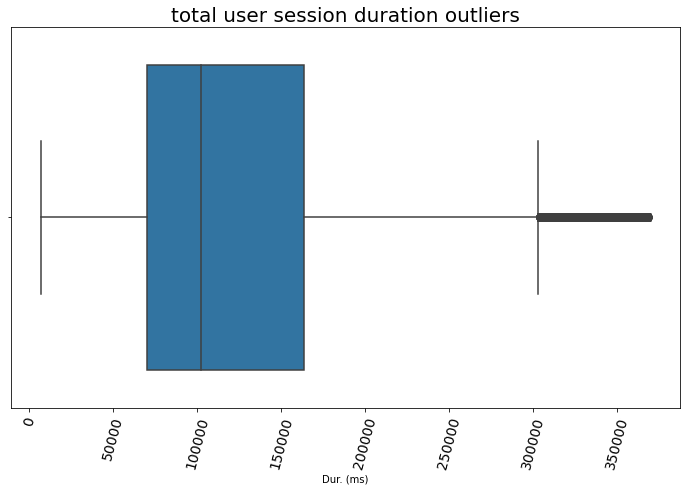

In [60]:
plot_box(data, "Dur. (ms)", "total user session duration outliers")

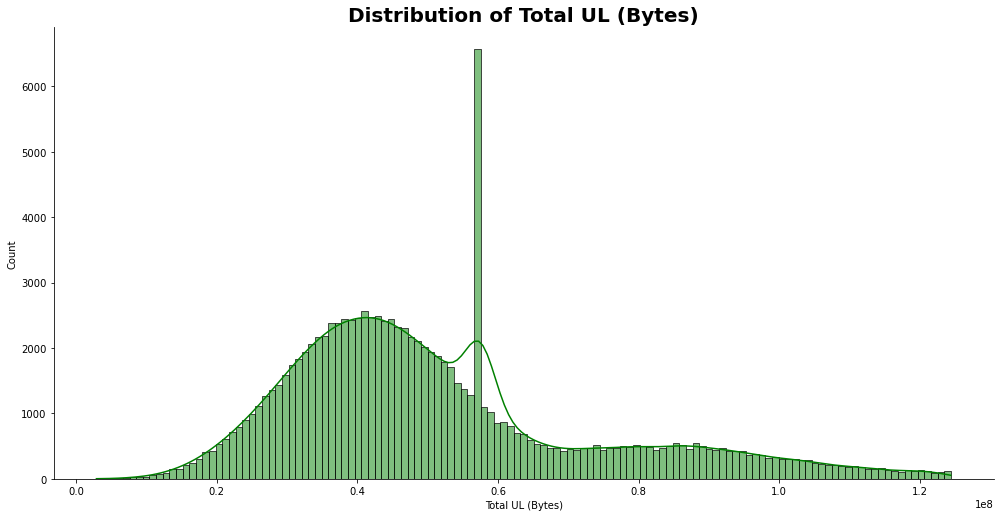

In [61]:
plot_hist(data, "Total UL (Bytes)", "green")

In [ ]:
plot_hist(data, "Total DL (Bytes)", "blue")

In [51]:
#Multivariate analysis
def total_data_per_app(df):
    cols = ['Social Media DL (Bytes)', 'Social Media UL (Bytes)', 'Google DL (Bytes)', 'Google UL (Bytes)',
            'Email DL (Bytes)', 'Email UL (Bytes)', 'Youtube DL (Bytes)', 'Youtube UL (Bytes)', 
            'Netflix DL (Bytes)', 'Netflix UL (Bytes)', 'Gaming DL (Bytes)', 'Gaming UL (Bytes)',
            'Other DL (Bytes)', 'Other UL (Bytes)']
    df['Social Media'] = df[cols[0]] + df[cols[1]]
    df['Google'] = df[cols[2]] + df[cols[3]]
    df['Email'] = df[cols[4]] + df[cols[5]]
    df['Youtube'] = df[cols[6]] + df[cols[7]]
    df['Netflix'] = df[cols[8]] + df[cols[9]]
    df['Gaming'] = df[cols[10]] + df[cols[11]]
    df['Other'] = df[cols[12]] + df[cols[13]]
    return df
data = total_data_per_app(data)

In [53]:
appdata = data[['Social Media','Google', 'Email','Youtube','Netflix','Gaming','Other']]
appdata.head(5)

,Social Media,Google,Email,Youtube,Netflix,Gaming,Other
IMSI,,,,,,,
204047108489451,"1,546,088.00","9,218,647.00","3,330,974.00","40,940,710.00","28,846,230.00","43,070,260.00","401,360,457.00"
204080810288647,"715,224.00","10,438,660.00","1,520,771.00","11,959,905.00","26,592,300.00","178,048,738.00","470,526,473.00"
208200101016140,"3,122,781.00","1,624,662.00","3,657,501.00","19,882,439.00","31,830,562.00","9,124,516.00","515,973,704.00"
208200101127285,"2,577,104.00","13,811,478.00","3,855,734.00","25,657,632.00","27,785,852.00","344,105,897.00","309,610,741.00"
208200101148045,"3,426,716.00","11,665,887.00","5,564,462.00","13,840,201.00","57,343,415.00","917,684,766.00","1,079,435,419.00"


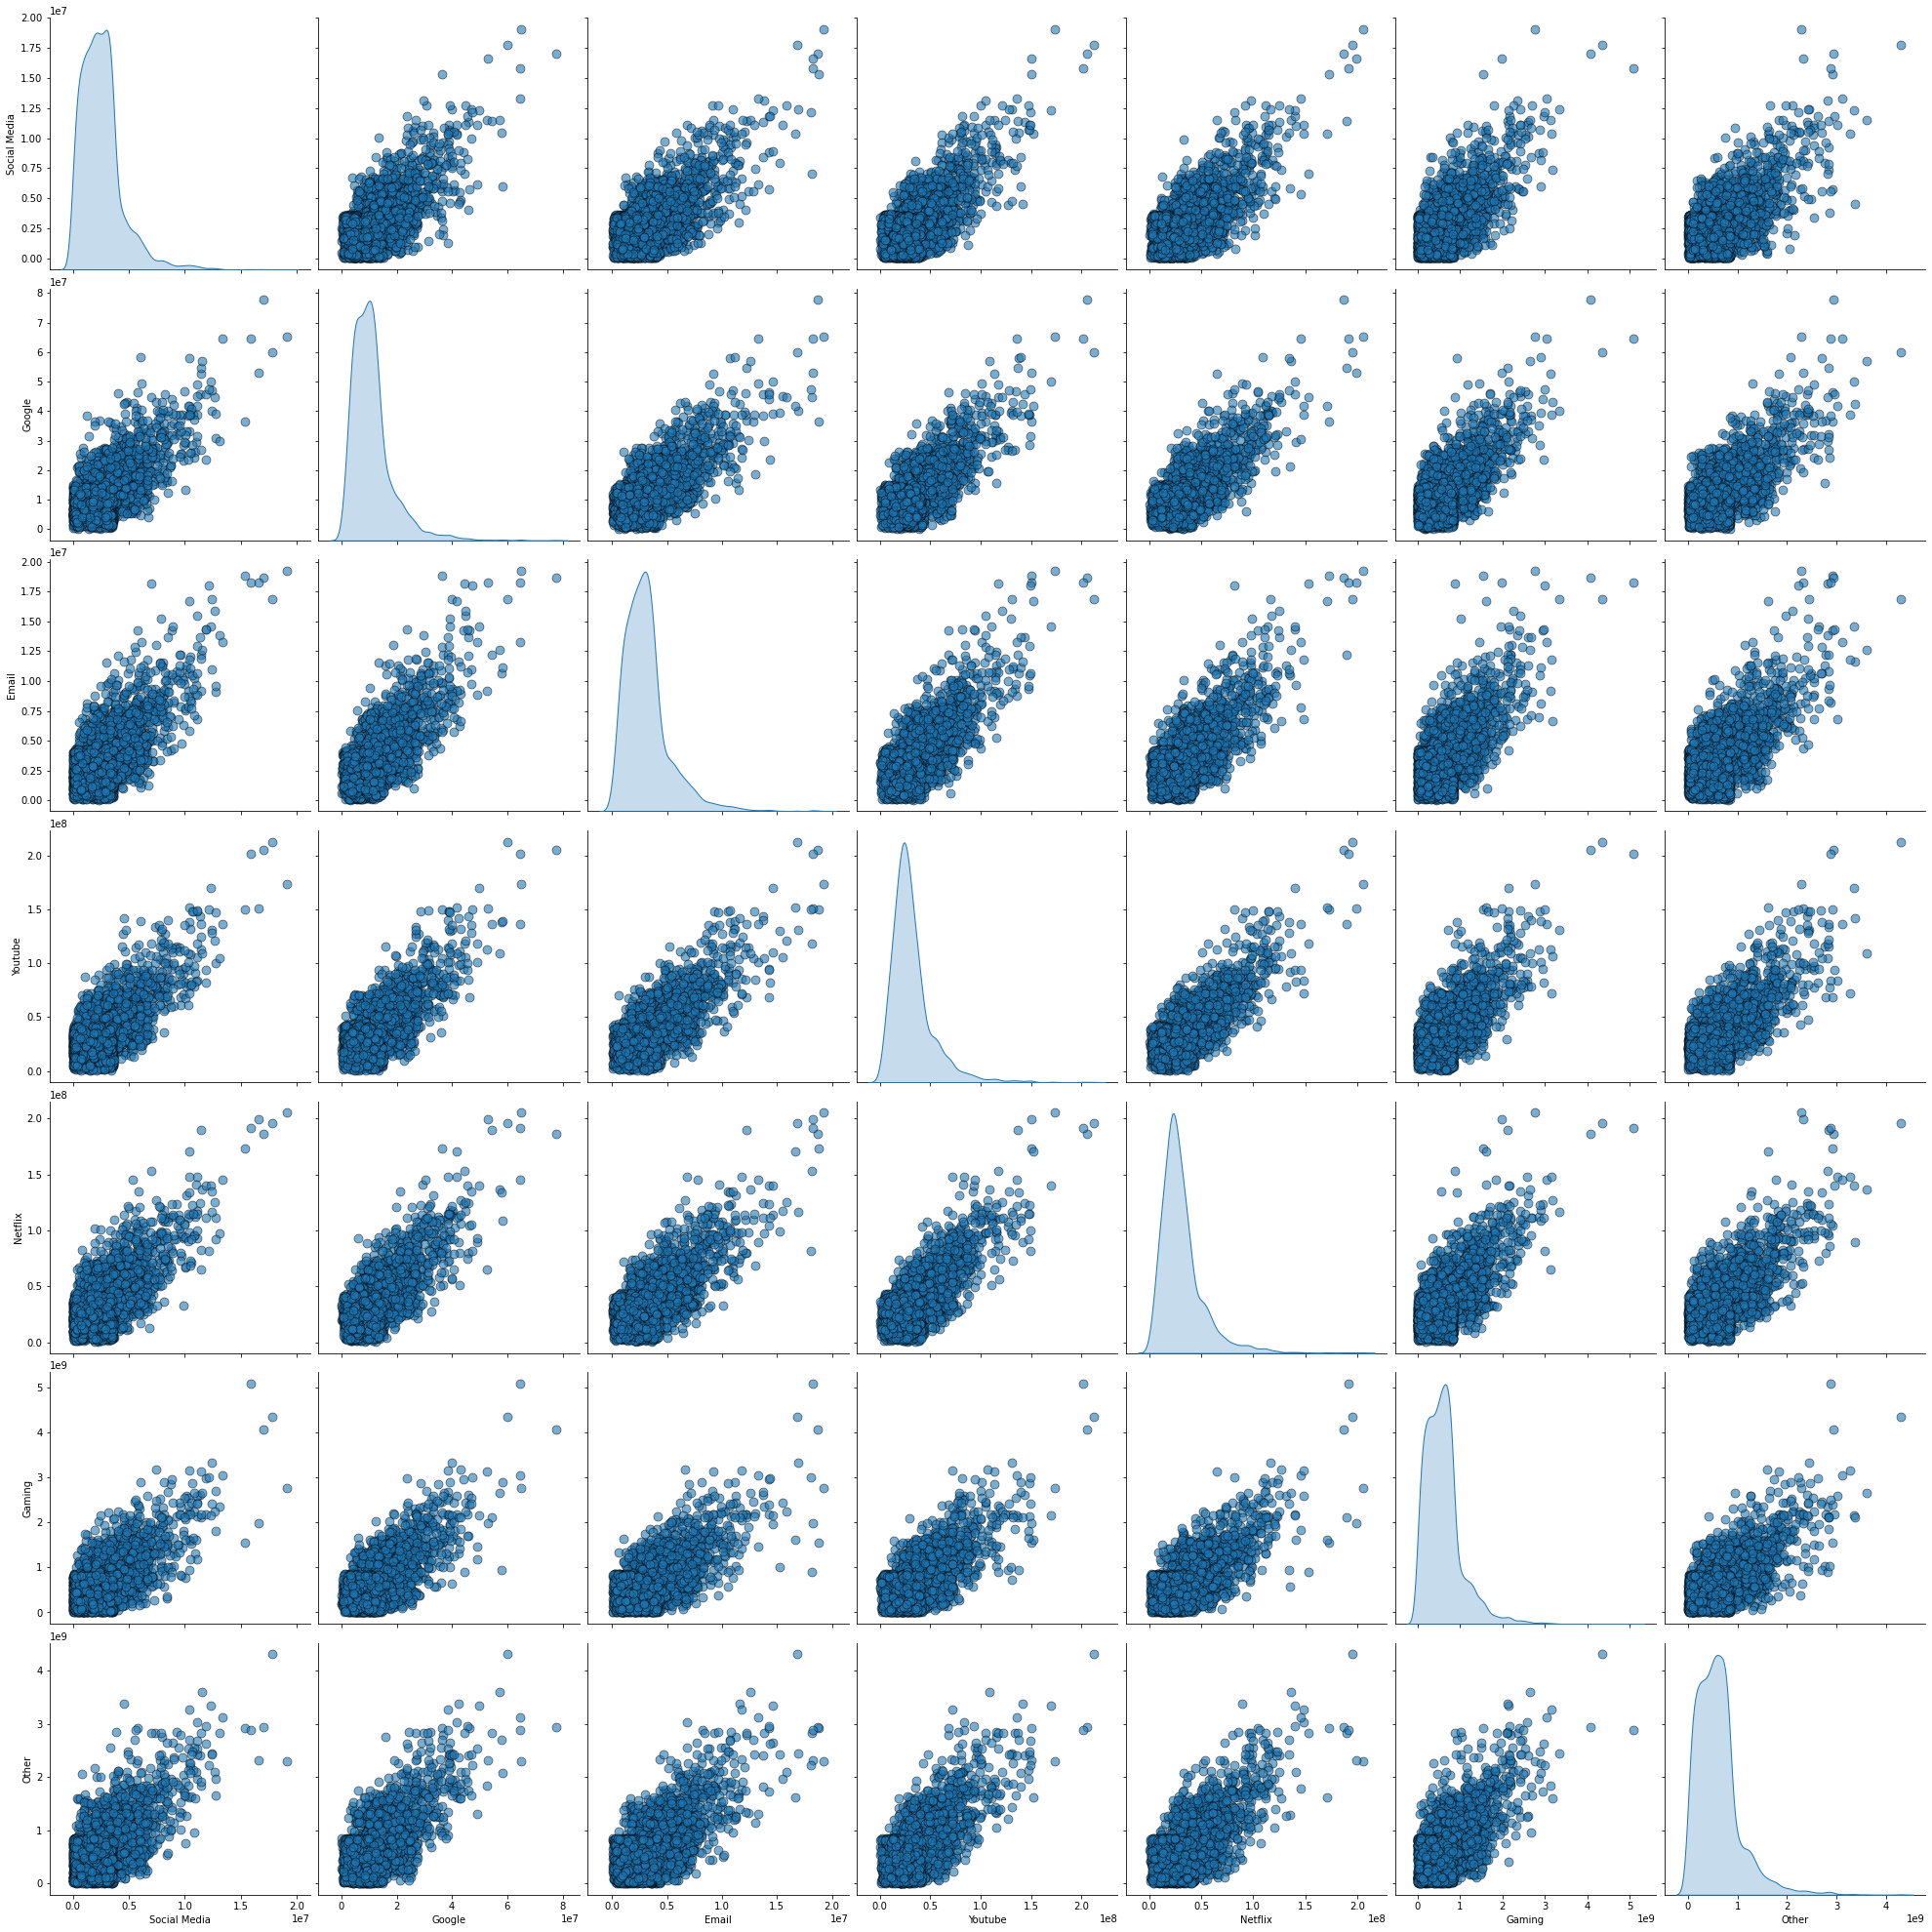

In [54]:
sns.pairplot(appdata.sample(5000), diag_kind = 'kde', 
             plot_kws = {'alpha': 0.6, 's': 80, 'edgecolor': 'k'},height=4)